In [20]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [21]:
data=pd.read_excel('dataset_new.xlsx',sheet_name='train')
data

,KodeBarang,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,cluster
0,04121,7,9,6,9,40,0,3,0,7,...,67,77,11,57,43,50,37,21,136,0
1,18031,230,227,279,153,190,256,267,305,238,...,336,153,103,221,360,280,240,120,548,1
2,04161,102,50,45,41,71,11,52,14,66,...,21,20,7,33,21,28,30,10,18,0
3,04162,272,155,214,226,268,110,204,253,193,...,102,118,120,211,292,105,108,101,117,1
4,04163,28,28,29,52,44,21,47,15,24,...,18,23,22,16,22,31,36,17,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,04157,55,64,44,61,30,1,24,37,67,...,20,10,300,34,7,7,6,4,21,0
102,18104,46,295,83,112,70,40,18,140,97,...,47,54,27,15,57,132,66,34,146,0
103,18106,200,204,0,2,10,7,0,27,74,...,15,136,15,15,14,131,84,12,14,0
104,18092,297,418,329,70,498,59,298,376,259,...,450,498,254,260,336,493,438,408,322,1


In [22]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [23]:
len(data['cluster'].unique())

4

In [24]:
#now lets take clusters
c0 = data.query("cluster == 0")
print("Jumlah Produk:")
print(c0['KodeBarang'].size)
c1 = data.query("cluster == 1")
print("Jumlah Produk:")
print(c1['KodeBarang'].size)
c2 = data.query("cluster == 2")
print("Jumlah Produk:")
print(c2['KodeBarang'].size)
c3 = data.query("cluster == 3")
print("Jumlah Produk:")
print(c3['KodeBarang'].size)

Jumlah Produk:
70
Jumlah Produk:
31
Jumlah Produk:
4
Jumlah Produk:
1


In [25]:
#oke ada ternyata yang cuman sendirian (1 product di cluster tersebut), kita beresin dia dulu, the easiest, dan biar keliatan kita
#ngapain aja di time series ini
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)
# ini fungsinya buat nge ubah dataset jadi windowed

# C3

In [26]:
#next kita ubah bentuk data nya dari yang tadinya kesamping jadi ke bawah, tapi pertama mau aku drop dulu cluster sama kode produknya
c3=c3.drop(columns=['KodeBarang','cluster'])
c3

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
38,497,725,1233,1145,149,422,341,893,655,1022,...,0,0,-5,0,0,-5,0,0,0,0


In [27]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, 
new_c3=[]
time=[]
for idx,_ in enumerate(c3):
    new_c3.append(c3.iloc[0,idx])
    time.append(idx)
print(time,new_c3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53] [497, 725, 1233, 1145, 149, 422, 341, 893, 655, 1022, 851, 758, 933, 1928, 912, 1106, 452, 151, 18079, 714, 617, 843, 436, 769, 1264, 1049, 1317, 962, 1008, 394, 659, 1046, 213, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -5, 0, 0, -5, 0, 0, 0, 0]


In [28]:
#normalisasi, karena gap nya ada yang sampe ribuan, biar lebih gampang tugas ann nya
series=new_c3
min = np.min(series)
max = np.max(series)
series = series - min
series = series / (max-min)

# scaler = MinMaxScaler(feature_range=(0, 1))
# series = scaler.fit_transform(series)

time = np.array(time)

In [29]:
series

array([2.77593453e-02, 4.03671754e-02, 6.84583057e-02, 6.35921256e-02,
       8.51581509e-03, 2.36120327e-02, 1.91329352e-02, 4.96571555e-02,
       3.64963504e-02, 5.67905331e-02, 4.73346605e-02, 4.21919929e-02,
       5.18690555e-02, 1.06890069e-01, 5.07078080e-02, 6.14355231e-02,
       2.52709578e-02, 8.62641009e-03, 1.00000000e+00, 3.97589029e-02,
       3.43950453e-02, 4.68922805e-02, 2.43861977e-02, 4.28002654e-02,
       7.01725282e-02, 5.82835656e-02, 7.31032957e-02, 5.34726830e-02,
       5.60163681e-02, 2.20637027e-02, 3.67175404e-02, 5.81176731e-02,
       1.20548551e-02, 2.76487503e-04, 2.76487503e-04, 3.87082504e-04,
       2.76487503e-04, 2.76487503e-04, 2.76487503e-04, 2.76487503e-04,
       2.76487503e-04, 2.76487503e-04, 2.76487503e-04, 2.76487503e-04,
       2.76487503e-04, 2.76487503e-04, 0.00000000e+00, 2.76487503e-04,
       2.76487503e-04, 0.00000000e+00, 2.76487503e-04, 2.76487503e-04,
       2.76487503e-04, 2.76487503e-04])

In [30]:
split_time = 6 # ini berapa bulan terkahir yang mau di potong buat pengujian?

time_train = time[:-split_time]
x_train =  series[:-split_time]
time_valid =  time[-split_time:]
x_valid =  series[-split_time:]

In [31]:
x_valid

array([0.00027649, 0.        , 0.00027649, 0.00027649, 0.00027649,
       0.00027649])

In [32]:
#buat data biar dibagi per window, jadi me masang masangkan waktu dan value,
window_size = 2
batch_size = 2
shuffle_buffer_size = 10

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [33]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=[None, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l1=0.01)),
        tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    #the blstm part

In [34]:
#Using mae and mse
#model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),metrics=['mae'],loss='mse')
model.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['mae'],loss='mse')
model.summary()
hist=model.fit(train_set,epochs=150,validation_data=valid_set, batch_size=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, None, 2)           4         
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        34304     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1024)              66560     
                                                                 
 dropout_2 (Dropout)         (None, 1024)             

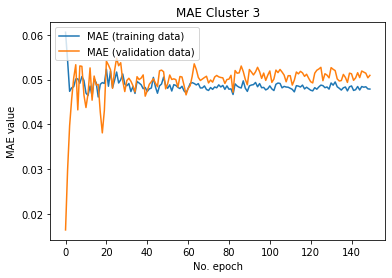

In [35]:
import matplotlib.pyplot as plt

plt.plot(hist.history['mae'], label='MAE (training data)')
plt.plot(hist.history['val_mae'], label='MAE (validation data)')

plt.title('MAE Cluster 3')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

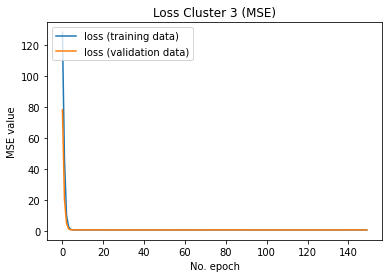

In [36]:
plt.plot(hist.history['loss'], label='loss (training data)')
plt.plot(hist.history['val_loss'], label='loss (validation data)')

plt.title("Loss Cluster 3 (MSE)")
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [38]:
prediksi=model.predict([48, 49, 50, 51, 52, 53])
prediksi

ValueError: in user code:

    File "C:\Users\igana\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\igana\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\igana\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\igana\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\Users\igana\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\igana\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\input_spec.py", line 227, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_1" (type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=False
      • mask=None


In [ ]:
prediksi=prediksi.flatten()

In [ ]:
hasil=np.concatenate((series[:-split_time],prediksi))

In [ ]:
hasil

In [ ]:
plt.plot(series,label='data asli')
plt.plot(hasil,label='data prediksi')
plt.title('penjualan produk cluster 3')
plt.legend()
plt.plot()

In [ ]:
model.save('cluster2_newdata.h5')

# C2

In [11]:
#next kita ubah bentuk data nya dari yang tadinya kesamping jadi ke bawah, tapi pertama mau aku drop dulu cluster sama kode produknya
c2=c2.drop(columns=['KodeBarang','cluster'])
c2

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
17,5307,3231,4562,372,4159,1853,6741,2884,5721,2573,...,2184,3210,2794,1243,2619,3888,1659,1971,2877,2138
30,3027,2097,6983,1318,2965,840,3094,1826,3463,5040,...,792,620,1265,910,713,867,630,860,758,747
48,2934,1481,1946,2130,2152,1563,1975,2426,1844,1944,...,1717,1858,1922,1731,2472,1846,2291,2199,1849,2180
82,0,33,2,0,3,27,23,9,7,-2,...,5597,2573,5687,5273,3236,8910,4665,7150,6726,5124


In [ ]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, tapi di average per tanggal 
new_c0=[]
time=[]
for idx,a in enumerate(c0):
    new_c0.append(c0[a].mean())
    time.append(idx)
